In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('./Dataset/credit_train.csv')

In [3]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(labels = ['Loan ID' ,'Customer ID' , 'Months since last delinquent'] , axis = 1 , inplace= True)

In [5]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.dropna(axis=0, how='all' , inplace=True)

In [63]:
data.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000
mean,0.773610,1.176045e+07,0.722080,709.734923,1.379834e+06,6.147420,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607914e+05,0.117740,0.02931
std,0.418496,3.178394e+07,0.447976,53.932422,1.087755e+06,3.520584,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384420e+06,0.351231,0.25817
min,0.000000,1.080200e+04,0.000000,165.771429,7.662700e+04,1.000000,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,1.000000,1.796520e+05,0.000000,702.000000,8.710740e+05,3.000000,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.00000
50%,1.000000,3.122460e+05,1.000000,721.000000,1.198601e+06,6.000000,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.00000
75%,1.000000,5.249420e+05,1.000000,737.000000,1.642132e+06,10.000000,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.00000
max,1.000000,1.000000e+08,1.000000,751.000000,1.655574e+08,10.000000,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.00000


In [7]:
data.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [8]:
data.interpolate(inplace=True)

In [9]:
data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         4222
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [10]:
data.shape

(100000, 16)

In [11]:
CS = data.iloc[:,3:4].values
CS

array([[709.],
       [725.],
       [741.],
       ...,
       [742.],
       [746.],
       [743.]])

In [12]:
type(CS)

numpy.ndarray

In [13]:
for x in CS:
    if(x[0] > 850):
        print(x)
        
CS

[4005.5]
[7290.]
[2828.]
[4974.]
[7120.]
[6610.]
[3631.]
[7380.]
[7370.]
[6240.]
[7210.]
[7500.]
[7020.]
[7080.]
[7140.]
[7080.]
[7490.]
[7360.]
[7160.]
[6990.]
[7410.]
[7360.]
[7310.]
[7040.]
[3894.5]
[3927.]
[7120.]
[3928.5]
[7060.]
[7200.]
[7450.]
[4074.]
[4010.5]
[7300.]
[4018.]
[7300.]
[7430.]
[4012.]
[7170.]
[2827.33333333]
[4913.66666667]
[7000.]
[4916.33333333]
[2832.66666667]
[7280.]
[5100.66666667]
[2921.33333333]
[7090.]
[6970.]
[7215.]
[7460.]
[7310.]
[6920.]
[3821.5]
[7350.]
[7190.]
[7410.]
[7040.]
[6690.]
[7210.]
[7170.]
[7300.]
[6750.]
[7290.]
[7460.]
[3883.5]
[7020.]
[7210.]
[7300.]
[7010.]
[6530.]
[7380.]
[2858.]
[4974.]
[7090.]
[7270.]
[7000.]
[7410.]
[7420.]
[6810.]
[7190.]
[7070.]
[4048.]
[7390.]
[7470.]
[7490.]
[4091.5]
[6670.]
[7310.]
[3711.]
[6710.]
[6580.]
[7020.]
[4079.5]
[7420.]
[4074.]
[6940.]
[6800.]
[7110.]
[7160.]
[7130.]
[7120.]
[7110.]
[7310.]
[6810.]
[7310.]
[7370.]
[3291.5]
[5860.]
[3963.]
[7210.]
[6960.]
[4033.]
[7380.]
[3862.]
[7000.]
[7150.]
[6400.]

[7280.]
[7440.]
[7380.]
[3750.]
[6800.]
[3774.5]
[3790.]
[6880.]
[6860.]
[7410.]
[6790.]
[7090.]
[7300.]
[3985.5]
[7200.]
[5897.2]
[4594.4]
[3291.6]
[1988.8]
[6450.]
[3567.]
[3980.]
[7250.]
[7470.]
[4106.5]
[7470.]
[7400.]
[4050.5]
[4051.]
[7400.]
[6900.]
[7000.]
[6930.]
[3789.5]
[6920.]
[7130.]
[6740.]
[7000.]
[7160.]
[6580.]
[4063.]
[7420.]
[6830.]
[7300.]
[2812.]
[4911.]
[7010.]
[7200.]
[6790.]
[7060.]
[3867.5]
[4105.5]
[7470.]
[7110.]
[6710.]
[7200.]
[3679.5]
[6680.]
[7400.]
[6330.]
[7460.]
[7120.]
[6610.]
[6850.]
[6750.]
[3750.5]
[7350.]
[7030.]
[7250.]
[7350.]
[7000.]
[6690.]
[6600.]
[6710.]
[6470.]
[6960.]
[7120.]
[3934.]
[7180.]
[6790.]
[4071.5]
[7400.]
[2808.]
[4894.]
[6980.]
[3421.5]
[6130.]
[3424.5]
[6510.]
[6850.]
[7140.]
[7320.]
[7020.]
[6670.]
[7330.]
[7220.]
[4060.5]
[7370.]
[7310.]
[7390.]
[7260.]
[4003.5]
[6820.]
[6890.]
[6220.]
[3476.]
[6900.]
[7400.]
[7375.]
[7350.]
[4023.]
[7430.]
[6440.]
[7420.]
[6630.]
[7190.]
[3922.5]
[7120.]
[7280.]
[7210.]
[3968.5]
[7420.]
[517

[7200.]
[7380.]
[7360.]
[4039.5]
[6970.]
[4895.33333333]
[2820.66666667]
[7240.]
[7380.]
[3974.]
[7240.]
[7320.]
[7380.]
[6740.]
[4743.]
[2746.]
[6780.]
[7370.]
[4056.5]
[2870.66666667]
[5085.33333333]
[7300.]
[7240.]
[7000.]
[7380.]
[4072.]
[7420.]
[6900.]
[7260.]
[7450.]
[3860.]
[7030.]
[7360.]
[3496.5]
[6250.]
[6570.]
[3650.]
[6990.]
[7360.]
[4053.]
[7340.]
[7270.]
[7250.]
[6990.]
[6650.]
[7180.]
[3564.5]
[6420.]
[7390.]
[7310.]
[6850.]
[4082.]
[7420.]
[7140.]
[6910.]
[7160.]
[7330.]
[7080.]
[7010.]
[6460.]
[6555.]
[6650.]
[7220.]
[4041.5]
[7380.]
[7320.]
[6820.]
[3944.]
[7140.]
[3943.]
[7250.]
[7090.]
[6570.]
[6630.]
[3629.]
[4004.]
[7300.]
[7500.]
[4081.5]
[7310.]
[7200.]
[3952.]
[6410.]
[7410.]
[6750.]
[3720.]
[7230.]
[7290.]
[4012.5]
[3933.5]
[7160.]
[3647.5]
[6610.]
[6860.]
[3867.5]
[7030.]
[4048.]
[7370.]
[6850.]
[7360.]
[7180.]
[7140.]
[7460.]
[5211.66666667]
[2963.33333333]
[4014.5]
[7330.]
[3890.]
[7040.]
[6830.]
[6620.]
[7360.]
[6720.]
[7390.]
[7060.]
[3449.]
[6180.]
[3456

[2838.66666667]
[4969.33333333]
[7100.]
[6220.]
[6500.]
[7070.]
[7340.]
[4035.5]
[7190.]
[3983.]
[7250.]
[6500.]
[7340.]
[7450.]
[6700.]
[7320.]
[7340.]
[7330.]
[4045.]
[7410.]
[7390.]
[3936.5]
[7170.]
[7460.]
[7190.]
[4117.5]
[7500.]
[6950.]
[7270.]
[7350.]
[2902.]
[5086.]
[7270.]
[7280.]
[7330.]
[4035.]
[7360.]
[3858.]
[7020.]
[7020.]
[3867.]
[7110.]
[6710.]
[7270.]
[7430.]
[4088.]
[7160.]
[7210.]
[7240.]
[7200.]
[7380.]
[7050.]
[6770.]
[3872.5]
[7050.]
[3837.5]
[7340.]
[4039.]
[7410.]
[7290.]
[6870.]
[6220.]
[7370.]
[4043.]
[7170.]
[3780.5]
[6940.]
[3842.]
[7140.]
[7420.]
[4077.5]
[7410.]
[6510.]
[7410.]
[5721.5]
[4033.]
[2344.5]
[7150.]
[7220.]
[6700.]
[7180.]
[3960.]
[2854.66666667]
[4962.33333333]
[7070.]
[7310.]
[7100.]
[6660.]
[7350.]
[6510.]
[7390.]
[7390.]
[7040.]
[4015.5]
[7340.]
[7270.]
[3676.]
[6640.]
[3691.5]
[7120.]
[4981.66666667]
[2843.33333333]
[7240.]
[7250.]
[7120.]
[7510.]
[3903.]
[7060.]
[3892.]
[7140.]
[7490.]
[4111.]
[4011.]
[7280.]
[4006.]
[7330.]
[4019.5]
[383

[7280.]
[3989.]
[7120.]
[7340.]
[4014.5]
[6830.]
[5850.]
[4065.5]
[7390.]
[6770.]
[7390.]
[7460.]
[6920.]
[3820.5]
[7020.]
[6650.]
[3674.5]
[7210.]
[6620.]
[6180.]
[6990.]
[7120.]
[7030.]
[7400.]
[6920.]
[3835.]
[3834.5]
[6920.]
[7360.]
[4047.5]
[7010.]
[7380.]
[7160.]
[6630.]
[7280.]
[5088.33333333]
[2896.66666667]
[3896.]
[7070.]
[3902.]
[7330.]
[7120.]
[2882.]
[5021.]
[7160.]
[7450.]
[6530.]
[3631.5]
[6730.]
[7490.]
[7270.]
[6930.]
[7070.]
[6890.]
[7360.]
[4045.]
[7200.]
[7030.]
[7290.]
[7380.]
[7130.]
[3874.]
[7390.]
[6680.]
[6480.]
[6720.]
[3718.5]
[3943.5]
[7170.]
[3947.]
[7290.]
[7160.]
[7100.]
[7500.]
[3831.5]
[6950.]
[3834.]
[3726.5]
[6730.]
[3683.]
[6620.]
[7290.]
[7460.]
[7460.]
[5220.]
[2980.]
[7060.]
[6780.]
[2766.66666667]
[4798.33333333]
[6830.]
[7140.]
[7040.]
[7060.]
[3990.5]
[7240.]
[7140.]
[7370.]
[2916.]
[5128.]
[7340.]
[7320.]
[7300.]
[7290.]
[6830.]
[7020.]
[7410.]
[7320.]
[7430.]
[7390.]
[4022.5]
[7310.]
[6580.]
[7470.]
[6960.]
[7150.]
[7380.]
[6990.]
[6410.]
[28

[4034.5]
[7360.]
[5137.66666667]
[2915.33333333]
[7240.]
[6300.]
[7170.]
[7440.]
[6930.]
[7030.]
[7400.]
[7240.]
[6850.]
[3785.5]
[7400.]
[7270.]
[7040.]
[7480.]
[5225.33333333]
[2970.66666667]
[7330.]
[7400.]
[2943.33333333]
[5161.66666667]
[7380.]
[7390.]
[7225.]
[7060.]
[3879.5]
[7350.]
[7460.]
[7130.]
[7350.]
[7180.]
[7050.]
[4948.]
[2846.]
[6820.]
[7220.]
[4055.5]
[7410.]
[4032.]
[7340.]
[4030.5]
[7240.]
[6990.]
[6940.]
[7200.]
[6990.]
[7140.]
[3970.5]
[7200.]
[7130.]
[7140.]
[7220.]
[7310.]
[7090.]
[7330.]
[6950.]
[5396.]
[3842.]
[2288.]
[3899.5]
[7060.]
[7230.]
[7460.]
[6940.]
[7240.]
[7400.]
[7240.]
[3475.]
[6220.]
[7160.]
[7330.]
[7270.]
[3897.]
[7070.]
[3652.5]
[6560.]
[6810.]
[7440.]
[7080.]
[7180.]
[7420.]
[7160.]
[7060.]
[7060.]
[6980.]
[7450.]
[7220.]
[2837.33333333]
[4928.66666667]
[7020.]
[7220.]
[6960.]
[7500.]
[4119.]
[6330.]
[6540.]
[7250.]
[3855.5]
[7000.]
[3977.]
[7300.]
[4011.5]
[7460.]
[4074.5]
[6600.]
[7170.]
[3940.5]
[7180.]
[7330.]
[6550.]
[3907.]
[7090.]
[609

array([[709.],
       [725.],
       [741.],
       ...,
       [742.],
       [746.],
       [743.]])

In [14]:
for x in CS:
    if(x[0] > 850):
        x[0]/=10
        
CS

array([[709.],
       [725.],
       [741.],
       ...,
       [742.],
       [746.],
       [743.]])

In [15]:
for x in CS:
    if(x[0] > 850):
        print(x)

In [16]:
data['Credit Score'] = CS

In [17]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.00,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,725.00,1699692.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.00,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.00,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,400.55,851903.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.00,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.00,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.00,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.00,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [18]:
data[data['Credit Score'] < 350]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
41,Fully Paid,210166.0,Short Term,282.800000,1.175568e+06,2 years,Rent,Debt Consolidation,13084.54,14.0,10.0,0.0,314336.0,483362.0,0.0,0.0
661,Fully Paid,65714.0,Short Term,282.733333,1.747411e+06,4 years,Rent,Other,1704.87,14.9,3.0,0.0,33250.0,120340.0,0.0,0.0
665,Fully Paid,393382.0,Short Term,283.266667,1.615120e+06,4 years,Home Mortgage,Debt Consolidation,19400.33,11.0,23.0,0.0,112765.0,419848.0,0.0,0.0
675,Fully Paid,329120.0,Long Term,292.133333,8.807260e+05,2 years,Rent,Debt Consolidation,20890.88,10.8,13.0,0.0,246373.0,690734.0,0.0,0.0
1163,Fully Paid,536602.0,Short Term,285.800000,1.203941e+06,< 1 year,Rent,Other,10057.08,5.4,8.0,0.0,50388.0,136290.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98707,Fully Paid,220066.0,Long Term,231.625000,1.467503e+06,8 years,Own Home,Home Improvements,13137.74,21.1,3.0,0.0,24814.0,44022.0,0.0,0.0
98967,Fully Paid,335016.0,Short Term,165.771429,1.135483e+06,4 years,Rent,Debt Consolidation,18517.21,9.9,13.0,0.0,239153.0,499862.0,0.0,0.0
98968,Fully Paid,123046.0,Short Term,259.142857,1.119567e+06,7 years,Rent,Debt Consolidation,15848.09,12.3,6.0,1.0,37392.0,81972.0,1.0,0.0
99575,Fully Paid,135124.0,Short Term,285.800000,9.891780e+05,< 1 year,Rent,Debt Consolidation,10717.14,15.7,23.0,0.0,184167.0,313170.0,0.0,0.0


<AxesSubplot:>

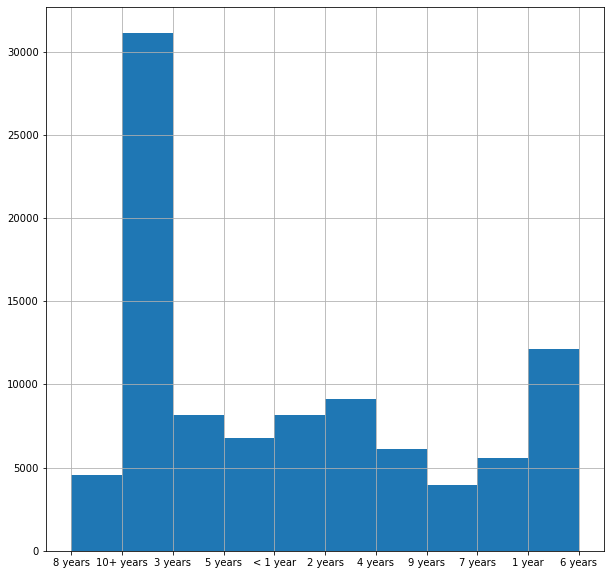

In [19]:
data['Years in current job'].hist(figsize=(10,10))

In [20]:
data['Years in current job'].fillna('10+ years' , inplace=True)

In [21]:
data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [22]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] =data['Years in current job'].astype(float)

In [23]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.00,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,725.00,1699692.5,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.00,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.00,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,400.55,851903.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.00,475437.0,7.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.00,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.00,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.00,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


<AxesSubplot:title={'center':'Purpose for Loans'}>

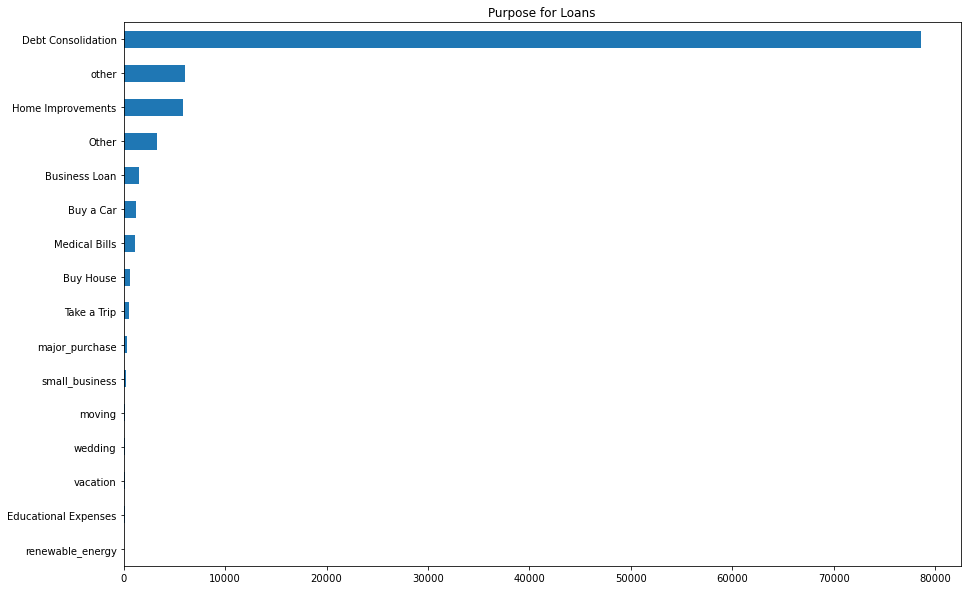

In [24]:
data['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', 
                    title="Purpose for Loans", figsize=(15,10))

In [25]:
le = LabelEncoder()

In [26]:
ledata = data

In [27]:
ledata['Loan Status'] = le.fit_transform(ledata['Loan Status'])

In [28]:
ledata['Loan Status']

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Loan Status, Length: 100000, dtype: int32

In [29]:
ledata['Term'] = le.fit_transform(ledata['Term'])

In [30]:
ledata['Term']

0        1
1        1
2        1
3        0
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Term, Length: 100000, dtype: int32

In [31]:
cat_data = ['Loan Status','Term','Home Ownership','Purpose']
transformer = ColumnTransformer([('transform', OneHotEncoder(), cat_data )],  remainder = 'passthrough')
tra=  np.array(transformer.fit_transform(data), dtype = np.float)

In [32]:
tra

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.16746e+05,
        1.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 8.50784e+05,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 7.50090e+05,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 5.37548e+05,
        1.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 7.38254e+05,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.10140e+04,
        1.00000e+00, 0.00000e+00]])

In [33]:
tra = pd.DataFrame(tra)

In [34]:
tra

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [35]:
rename={1:'Paid',0:'Charged Off',2:'Long Term',3:'Short Term',5:'Home Mortgage',6:'Own Home', 7:'Rent',4:'Have Mortage'
        ,13:'Home Improvements', 11:'Debt Consolidation',19:'other', 15:'Other', 17:'major_purchase', 21:'small_business'
        ,14:'Medical Bills', 8:'Business Loan', 9:'Buy House', 10:'Buy a Car', 16:'Take a Trip', 23:'wedding', 22:'vacation'
        ,18:'moving', 12:'Educational Expenses', 20:'renewable energy', 24:"Loan Amount", 25:'credit score'
        ,26:'Annaual InCOME',27:'Years in Job',28:'monthly debt',29:'credit history',30:'Open account',31:'credit Problem'
        ,32:'Current credit balance',33:'Maximum open credit',34:'Bankruptcies',35:'Tax Liens', }

In [36]:
tra.rename(columns=rename, inplace=True)
tra

,Charged Off,Paid,Long Term,Short Term,Have Mortage,Home Mortgage,Own Home,Rent,Business Loan,Buy House,...,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit,Bankruptcies,Tax Liens
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [37]:
tra[tra['Charged Off'] == 1]

,Charged Off,Paid,Long Term,Short Term,Have Mortage,Home Mortgage,Own Home,Rent,Business Loan,Buy House,...,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit,Bankruptcies,Tax Liens
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.968570e+05,10.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.871652e+06,1.0,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
16,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.445723e+06,7.0,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0
20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.133274e+06,8.0,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0
22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.890690e+06,2.0,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.046805e+06,10.0,32625.28,16.9,8.0,0.0,268964.0,415800.0,0.0,0.0
99975,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.096500e+05,10.0,4204.70,35.3,13.0,0.0,102866.0,844712.0,0.0,0.0
99981,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.838380e+06,7.0,48939.44,12.4,18.0,0.0,507414.0,1004322.0,0.0,0.0
99988,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.749533e+05,10.0,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0


In [38]:
tra.drop(columns=['Charged Off', 'Long Term', 'Have Mortage', 'renewable energy'], axis=1, inplace=True)

In [39]:
tra

,Paid,Short Term,Home Mortgage,Own Home,Rent,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,...,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit,Bankruptcies,Tax Liens
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [40]:
data['Credit Score']

0        709.00
1        725.00
2        741.00
3        721.00
4        400.55
          ...  
99995    725.00
99996    732.00
99997    742.00
99998    746.00
99999    743.00
Name: Credit Score, Length: 100000, dtype: float64

In [41]:
for x in CS:
    if x < 250:
        x[0] = None

In [42]:
array_sum = np.sum(CS)
array_has_nan = np.isnan(array_sum)

In [43]:
tra.describe()

,Paid,Short Term,Home Mortgage,Own Home,Rent,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,...,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit,Bankruptcies,Tax Liens
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000
mean,0.773610,0.722080,0.48410,0.091820,0.421940,0.015690,0.006780,0.012650,0.785520,0.000990,...,1.379834e+06,6.147420,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607914e+05,0.117740,0.02931
std,0.418496,0.447976,0.49975,0.288773,0.493872,0.124274,0.082062,0.111759,0.410463,0.031449,...,1.087755e+06,3.520584,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384420e+06,0.351231,0.25817
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.662700e+04,1.000000,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,8.710740e+05,3.000000,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.00000
50%,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.198601e+06,6.000000,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.00000
75%,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.642132e+06,10.000000,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.00000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.655574e+08,10.000000,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.00000


In [44]:
tra.head(5)

,Paid,Short Term,Home Mortgage,Own Home,Rent,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,...,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit,Bankruptcies,Tax Liens
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [45]:
y = tra.iloc[:,0].values
y

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
x = tra.iloc[: , 1:].values

In [47]:
y.shape

(100000,)

In [48]:
x.shape

(100000, 31)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [51]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((80000, 31), (80000,), (20000, 31), (20000,))

In [52]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((80000, 31), (80000,), (20000, 31), (20000,))

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [55]:
rfr = RandomForestRegressor( criterion= 'mse' , random_state= 0)
rfr.fit(x_train , y_train)

RandomForestRegressor(random_state=0)

In [56]:
y_pred = rfr.predict(x_test)

In [60]:
y_pred

array([0.95, 1.  , 0.74, ..., 0.86, 1.  , 0.69])

In [61]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred )

0.1199372242453991